In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from vae import VAE

## PREPARE MNIST DATA

'''
from tensorflow.keras.datasets import mnist
model_name = 'mnist_50epochs'
(x_train, y_train),(x_test, y_test) = mnist.load_data()
zerInd = np.where(np.any([y_train == 0, y_train == 1,y_train == 2], axis = 0))
zerIndTest = np.where(np.any([y_test == 0, y_test == 1, y_test == 2],axis = 0))

x_train = x_train.reshape(x_train.shape + (1,)).astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,)).astype('float32') / 255.
x_train4 = x_train[zerInd]
x_test4 = x_test[zerIndTest]

waves_bool = False
signal_shape = (28,28,1)
batch_size = 100
train_dataset = tf.data.Dataset.from_tensor_slices(x_train4).shuffle(x_train4.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test4).shuffle(x_test4.shape[0]).batch(batch_size)

'''
## PREPARE WAVEFORMS DATA

def transform_waveforms(waveforms):
	return np.sign(waveforms)*np.log(1+np.abs(waveforms))

from scipy.io import loadmat
name = 'gg-waveforms-R10_IL1B_TNF_03.mat'
model_name = 'waveforms-50epochs-R10_IL1B_TNF_03'
time_name = 'gg-self_time.mat'
#test = loadmat(name)
time = loadmat(time_name)['gg_time']
waveforms = loadmat(name)['waveforms']
waveforms = waveforms.reshape(waveforms.shape + (1,)).astype('float32')
#waveforms = tf.keras.utils.normalize(waveforms, axis=0)
#waveforms = transform_waveforms(waveforms)
no_training_samples = int(waveforms.shape[0]*0.8)
x_train = waveforms[:no_training_samples]
x_test = waveforms[no_training_samples:]

waves_bool = True
signal_shape = (141,1)
batch_size = 100
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).shuffle(x_test.shape[0]).batch(batch_size)


In [26]:
waveforms.shape

(136093, 141, 1)

## PLOTTING WAVEFORMS AND MEDIAN

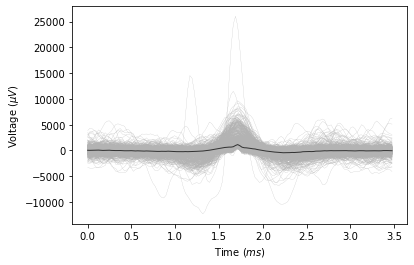

In [46]:
time = np.arange(0,3.5,3.5/signal_shape[0])
ind = np.arange(10,10000,10)
for i in range(10,10000,10):
    plt.plot(time,waveforms[i,:,0],color = (0.7,0.7,0.7),lw=0.2)
plt.plot(time,np.median(waveforms[ind,:,0],axis=0),color = (0.2,0.2,0.2),lw=1)
plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(\mu V)$')
plt.show()
#plt.plot(waveforms[20,:,:])

In [63]:
from scipy import signal
okok = np.ones((ind.shape[0],1))*np.arange(0, 141)
cwtmatr = signal.cwt(waveforms[1,:,0], signal.ricker,np.arange(1, 141))

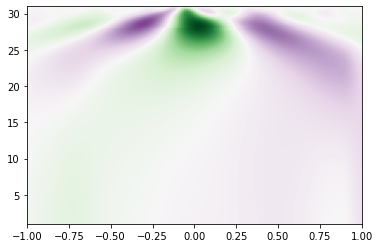

In [64]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()